In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


import time
from datetime import datetime

from fun import import_tweets

In [2]:
#Import data from CSV:

data = pd.read_csv('../datos_prueba.csv')
data.tail()

,Nombre,Ocupación,Afiliación,Izda,Twitter
14,Álvaro Ojeda,Periodista,OKDiario,0,@alvaroojeda80
15,Cake Minuesa,Presentador,NaN,0,@cakealatake
16,Libertad y lo que Surja,Youtuber,NaN,0,@LibertadSurja
17,Melisa D. Ruiz,Twitero,HSM,0,@MelisaDRuiz
18,Wall Street Wolverine,Youtuber,NaN,0,@wallstwolverine


1    10
0     9
Name: Izda, dtype: int64


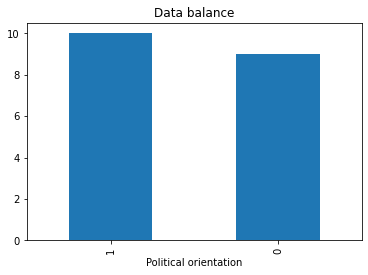

In [3]:
#How balanced is the dataset:
balance = data['Izda'].value_counts()
print(balance)


balance.plot(kind='bar')

plt.title('Data balance')
plt.xlabel('Political orientation')

plt.show()

In [4]:
#We transform data:

clasification = zip(data['Twitter'], data['Izda'])
clasification = dict(clasification)

clasification["@PODEMOS"]

1

In [5]:
#POSIBLE IMPROVEMENT ---> IMPLEMENT CONCURRENCY

#I have made this function to measure how much time spends the function:
ini = datetime.now()
time_execution = lambda : (datetime.now() - ini).total_seconds()
max_min = 60

#We store at directions that remain to be downloaded in a list:
remaining = list(clasification.keys())
all_tweets = dict()

i = 1
while((remaining != []) and (time_execution()<max_min*60)):
    for at in remaining:
        #We call import_tweets function
        tweets = import_tweets(at, 600)
    
        if(tweets == 0):
            print("ERROR: " + at)
        else:
            print(at + " completed.")
            all_tweets[at] = tweets
            remaining.remove(at)

    print( "{} - Loop ended. Time of execution: {} s\n".format(i, time_execution()) )
    i += 1
    time.sleep(10)

@PODEMOS completed.
@IzquierdaUnida completed.
@AlmasVeganas completed.
@carmencalvo_ completed.
@PabloIglesias completed.
@juanrallo completed.
@pacomarhuenda completed.
@alvaroojeda80 completed.
@LibertadSurja completed.
@wallstwolverine completed.
1 - Loop ended. Time of execution: 267.24467 s

@PSOE completed.
@sanchezcastejon completed.
@IreneMontero completed.
@eduardoinda completed.
@MelisaDRuiz completed.
2 - Loop ended. Time of execution: 408.795966 s

@anticapi completed.
@dlacalle completed.
3 - Loop ended. Time of execution: 475.560542 s

@JosepBorrellF completed.
4 - Loop ended. Time of execution: 511.015778 s

@cakealatake completed.
5 - Loop ended. Time of execution: 558.460636 s



In [6]:
if(remaining == []):
    print("All it's OK!")
else:
    print("We couldn't load tweets from:")
    for i in remaining:
        print(i)

All it's OK!


Tweets downloaded right wing:  4060
Tweets downloaded left wing:  3223


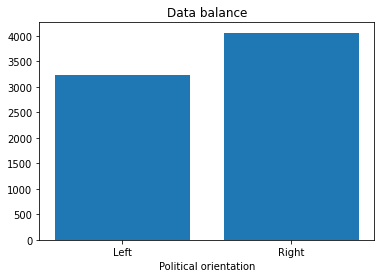

In [7]:
total_left = 0
total_right = 0
for i in all_tweets:
    if (1 == clasification[i]):
        total_left += len(all_tweets[i])
    else:
        total_right += len(all_tweets[i])

print("Tweets downloaded right wing: ", total_right)
print("Tweets downloaded left wing: ", total_left)

plt.bar(['Left', 'Right'], [total_left, total_right])
plt.title('Data balance')
plt.xlabel('Political orientation')

plt.show()

In [8]:
#The total number of tweets:
k = 0
for i in all_tweets:
    k += len(all_tweets[i])
print("Number of tweets: {}".format(k))

#Length of the longest at:
max_at = 0
for i in clasification:
    if(max_at < len(i)):
        max_at = len(i)
        at = i
print("Longest at: {}, ({})".format(max_at, at))
#Length of the longest tweet:
max_l = 0
for i in all_tweets:
    for j in all_tweets[i]:
        if(max_l < len(j)):
            max_l = len(j)
print("Longest tweet length: {}".format(max_l))

Number of tweets: 7283
Longest at: 16, (@sanchezcastejon)
Longest tweet length: 368


In [9]:
data_to_csv = []
for at in all_tweets:
    for tweet in all_tweets[at]:
        data_to_csv.append( (at, tweet, clasification[at]) )

colunms = ['User', 'Tweet', 'Left']
df = pd.DataFrame(data_to_csv, columns=colunms)
df.to_csv('raw_tweets.csv', index=False)
df

,User,Tweet,Left
0,@PODEMOS,"📽️ @isaserras: ""no hay más excusas. se pueden ...",1
1,@PODEMOS,👉el pp lleva más de 1000 días bloqueando la re...,1
2,@PODEMOS,"📽️ @isaserras: ""nos parece central que estos p...",1
3,@PODEMOS,🔴 en directo: rueda de prensa de @isaserras y ...,1
4,@PODEMOS,🇺🇸 los aliados de vox en texas han logrado pro...,1
...,...,...,...
7278,@cakealatake,arde la calle- invasión de ceuta y melilla htt...,0
7279,@cakealatake,en tiempos difíciles hay quien da la cara....p...,0
7280,@cakealatake,@manhattanmanone @telemadrid qué grande antoni...,0
7281,@cakealatake,@cvsaotxo minuesa...con m.,0
